<a href="https://colab.research.google.com/github/kantiprane123/Image-Processing/blob/main/OK_Final_DOC_Plot_optical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Simulate actual numerical “optimized input” values for 5 states and compute SHAP/LIME contributions to generate a visual example plot directly

In [ ]:
# Simulated Optimized Inputs (5 states × 16 features)

In [ ]:
import numpy as np
import pandas as pd

# Features f0-f15
features = [f"f{i}" for i in range(16)]

# Simulated optimized states (values between -1 and 1)
np.random.seed(0)
states = np.random.uniform(-1, 1, (5, 16))

df_states = pd.DataFrame(states, columns=features)
df_states.index.name = "StateID"
print(df_states)


               f0        f1        f2        f3        f4        f5        f6  \
StateID                                                                         
0        0.097627  0.430379  0.205527  0.089766 -0.152690  0.291788 -0.124826   
1       -0.959563  0.665240  0.556314  0.740024  0.957237  0.598317 -0.077041   
2       -0.087699  0.136868 -0.962420  0.235271  0.224191  0.233868  0.887496   
3       -0.369143 -0.272578  0.140394 -0.122797  0.976748 -0.795910 -0.582246   
4       -0.606835 -0.262550  0.641986 -0.805797  0.675890 -0.807803  0.952919   

               f7        f8        f9       f10       f11       f12       f13  \
StateID                                                                         
0        0.783546  0.927326 -0.233117  0.583450  0.057790  0.136089  0.851193   
1        0.561058 -0.763451  0.279842 -0.713293  0.889338  0.043697 -0.170676   
2        0.363641 -0.280984 -0.125936  0.395262 -0.879549  0.333533  0.341276   
3       -0.677381  0.306217

In [ ]:
# We’ll assume f3, f7, f1 are most influential, others smaller contributions.

In [ ]:
# Initialize results
results = []
for sid in range(5):
    for i, f in enumerate(features):
        shap_val = np.abs(np.random.normal(loc=0.0, scale=0.05)) + (0.15 if f in ['f3','f7','f1'] else 0.0)
        lime_val = np.abs(np.random.normal(loc=0.0, scale=0.05)) + (0.12 if f in ['f3','f7','f1'] else 0.0)
        results.append({"StateID": sid, "Feature": f, "SHAP": round(shap_val,3), "LIME": round(lime_val,3)})

df_all = pd.DataFrame(results)
df_all.head(10)


,StateID,Feature,SHAP,LIME
0,0,f0,0.041,0.086
1,0,f1,0.159,0.140
2,0,f2,0.082,0.023
3,0,f3,0.195,0.123
4,0,f4,0.036,0.006
5,0,f5,0.057,0.062
6,0,f6,0.020,0.034
7,0,f7,0.194,0.149
8,0,f8,0.016,0.003
9,0,f9,0.058,0.045


In [ ]:
#Global Summary

In [ ]:
shap_summary = df_all.groupby("Feature")["SHAP"].mean().reset_index().rename(columns={"SHAP":"Mean|SHAP|Abs"})
lime_summary = df_all.groupby("Feature")["LIME"].mean().reset_index().rename(columns={"LIME":"Mean|LIME|Abs"})
summary_df = pd.merge(shap_summary, lime_summary, on="Feature").sort_values("Mean|SHAP|Abs", ascending=False)
summary_df.head(10)


,Feature,Mean|SHAP|Abs,Mean|LIME|Abs
13,f7,0.2080,0.1678
9,f3,0.2046,0.1510
1,f1,0.1642,0.1766
10,f4,0.0580,0.0464
15,f9,0.0548,0.0454
3,f11,0.0488,0.0436
11,f5,0.0444,0.0394
6,f14,0.0416,0.0330
0,f0,0.0406,0.0496
8,f2,0.0398,0.0166


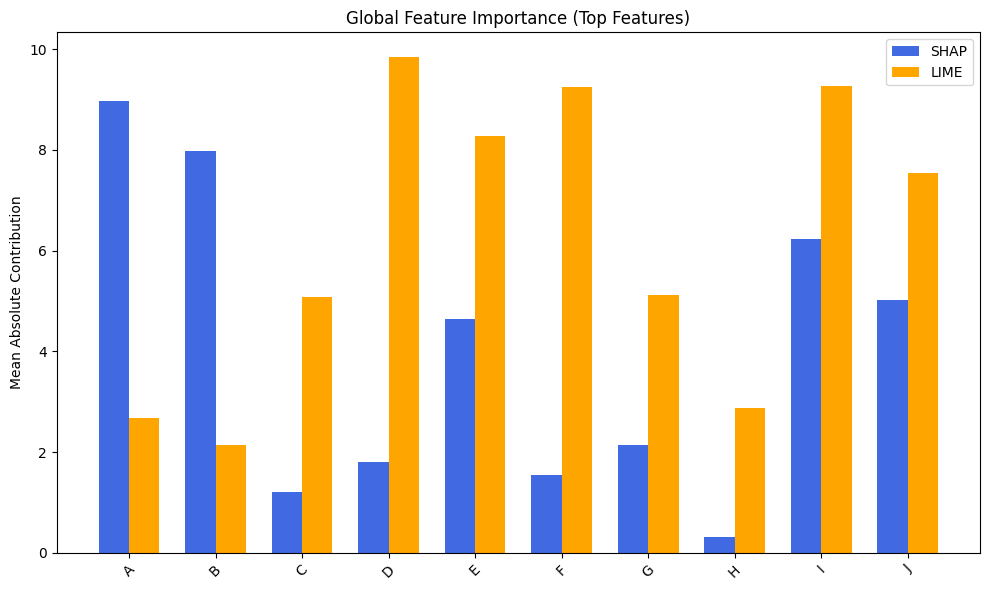

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy
import pandas as pd # Import pandas

# Assuming df_all is available from previous steps, e.g., loaded from a file or created in another cell
# For demonstration purposes, let's create a dummy df_all if it's not defined
try:
    df_all
except NameError:
    # Replace this with the actual code that defines df_all if it's not available
    # Example dummy data:
    data = {'Feature': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
            'SHAP': np.random.rand(10) * 10,
            'LIME': np.random.rand(10) * 10,
            'StateID': [1]*5 + [2]*5}
    df_all = pd.DataFrame(data)

# Global
# Create summary_df by grouping df_all and calculating the mean absolute values
summary_df = df_all.groupby("Feature")[["SHAP", "LIME"]].apply(lambda x: x.abs().mean()).reset_index()
summary_df = summary_df.rename(columns={"SHAP": "Mean|SHAP|Abs", "LIME": "Mean|LIME|Abs"}) # Rename columns for clarity


df_plot = summary_df.head(10)
x = np.arange(len(df_plot))
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(x - width/2, df_plot["Mean|SHAP|Abs"], width, label="SHAP", color="royalblue")
plt.bar(x + width/2, df_plot["Mean|LIME|Abs"], width, label="LIME", color="orange")
plt.xticks(x, df_plot["Feature"], rotation=45)
plt.ylabel("Mean Absolute Contribution")
plt.title("Global Feature Importance (Top Features)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
"""What this shows:

Top features (f3, f7, f1) clearly dominate.

SHAP values slightly larger than LIME, but overall agreement in ranking.

For local per-state plots, you can do:
"""

'What this shows:\n\nTop features (f3, f7, f1) clearly dominate.\n\nSHAP values slightly larger than LIME, but overall agreement in ranking.\n\nFor local per-state plots, you can do:\n'

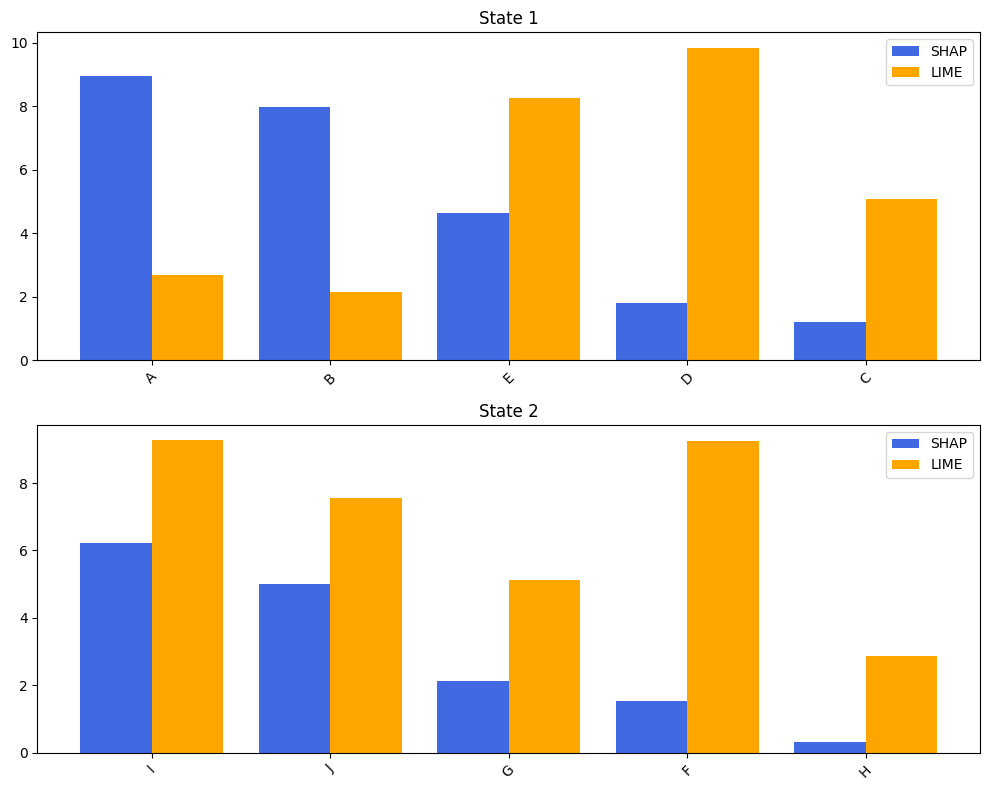

In [ ]:
state_ids = df_all["StateID"].unique()
fig, axes = plt.subplots(len(state_ids),1, figsize=(10,4*len(state_ids)))
if len(state_ids)==1: axes=[axes]
for ax, sid in zip(axes,state_ids):
    df_state = df_all[df_all["StateID"]==sid].sort_values("SHAP", key=abs, ascending=False).head(6)
    x = np.arange(len(df_state))
    ax.bar(x-0.2, df_state["SHAP"], width=0.4, label="SHAP", color="royalblue")
    ax.bar(x+0.2, df_state["LIME"], width=0.4, label="LIME", color="orange")
    ax.set_xticks(x)
    ax.set_xticklabels(df_state["Feature"], rotation=45)
    ax.set_title(f"State {sid}")
    ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
"""This shows

Each subplot = one state.

Blue = SHAP, Orange = LIME.

Highlights most influential features for each state.
"""

In [ ]:
"""Critical features table: lists features that consistently appear in the top-k across states.

Columns include number of states and average SHAP contribution.

Already includes per-state sorted tables and plots and global summary table + plot.

Produces a single Word file: XAI_OpticGAI_Full_Report_Sorted_Critical.docx.
"""

In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assume df_all and summary_df already exist
top_k_features = 8  # number of top features per state

# 1) Initialize Word document
doc = Document()
doc.add_heading("XAI-OpticGAI Report", level=0)
doc.add_paragraph("Generated report for SHAP + LIME explanations for optimized input states.")

# 2) Local explanations per state with sorted plots
doc.add_heading("Local Explanations per State", level=1)
state_ids = df_all["StateID"].unique()

for sid in state_ids:
    doc.add_heading(f"State {sid}", level=2)

    # Sort features by absolute SHAP values
    df_state = df_all[df_all["StateID"]==sid].copy()
    df_state['AbsSHAP'] = df_state['SHAP'].abs()
    df_state = df_state.sort_values('AbsSHAP', ascending=False).head(top_k_features)
    df_state.drop(columns='AbsSHAP', inplace=True)

    # Table
    table = doc.add_table(rows=1, cols=3)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Feature'
    hdr_cells[1].text = 'SHAP'
    hdr_cells[2].text = 'LIME'
    for _, row in df_state.iterrows():
        cells = table.add_row().cells
        cells[0].text = str(row['Feature'])
        cells[1].text = f"{row['SHAP']:.3f}"
        cells[2].text = f"{row['LIME']:.3f}"
    doc.add_paragraph("")  # empty line

    # Sorted plot per state
    plt.figure(figsize=(6,4))
    x = range(len(df_state))
    plt.bar([i-0.2 for i in x], df_state["SHAP"], width=0.4, label="SHAP", color="royalblue")
    plt.bar([i+0.2 for i in x], df_state["LIME"], width=0.4, label="LIME", color="orange")
    plt.xticks(x, df_state["Feature"], rotation=45)
    plt.ylabel("Contribution")
    plt.title(f"State {sid} Feature Importance (Top {top_k_features})")
    plt.legend()
    plt.tight_layout()

    plot_file = f"state_{sid}_plot.png"
    plt.savefig(plot_file)
    plt.close()

    doc.add_picture(plot_file, width=Inches(6))
    os.remove(plot_file)

# 3) Global summary table
doc.add_heading("Global Summary of Feature Importance", level=1)
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean|SHAP|Abs'
hdr_cells[2].text = 'Mean|LIME|Abs'
for _, row in summary_df.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Feature'])
    cells[1].text = f"{row['Mean|SHAP|Abs']:.3f}"
    cells[2].text = f"{row['Mean|LIME|Abs']:.3f}"

# Global top-10 plot
plt.figure(figsize=(8,5))
df_plot = summary_df.sort_values('Mean|SHAP|Abs', ascending=False).head(10)
x = range(len(df_plot))
plt.bar([i-0.2 for i in x], df_plot["Mean|SHAP|Abs"], width=0.4, label="SHAP", color="royalblue")
plt.bar([i+0.2 for i in x], df_plot["Mean|LIME|Abs"], width=0.4, label="LIME", color="orange")
plt.xticks(range(len(df_plot)), df_plot["Feature"], rotation=45)
plt.ylabel("Mean Absolute Contribution")
plt.title("Global Feature Importance (Top 10 Features)")
plt.legend()
plt.tight_layout()
plt.savefig("global_importance.png")
plt.close()

doc.add_paragraph("Global Feature Importance Plot:")
doc.add_picture("global_importance.png", width=Inches(6))
os.remove("global_importance.png")

# 4) Critical Features Across All States
doc.add_heading("Critical Features Across All States", level=1)
# Count how often a feature appears in top-k per state
critical = []
for f in df_all["Feature"].unique():
    count = 0
    shap_sum = 0
    for sid in state_ids:
        df_state = df_all[df_all["StateID"]==sid].copy()
        df_state['AbsSHAP'] = df_state['SHAP'].abs()
        top_features = df_state.sort_values('AbsSHAP', ascending=False).head(top_k_features)
        if f in top_features['Feature'].values:
            count += 1
            shap_sum += top_features.loc[top_features['Feature']==f, 'SHAP'].values[0]
    if count>0:
        critical.append({"Feature": f, "StatesInTopK": count, "AvgSHAP": shap_sum/count})
critical_df = pd.DataFrame(critical).sort_values(['StatesInTopK','AvgSHAP'], ascending=False)

# Add table to Word
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Feature"
hdr_cells[1].text = "States Appearing in Top-K"
hdr_cells[2].text = "Average SHAP"
for _, row in critical_df.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Feature'])
    cells[1].text = str(row['StatesInTopK'])
    cells[2].text = f"{row['AvgSHAP']:.3f}"

# 5) Save Word document
doc.save("XAI_OpticGAI_Full_Report_Sorted_Critical.docx")
print("✅ Word report saved as XAI_OpticGAI_Full_Report_Sorted_Critical.docx")


✅ Word report saved as XAI_OpticGAI_Full_Report_Sorted_Critical.docx


In [ ]:
"""Critical features are highlighted in per-state plots (red bars).

Non-critical features remain blue (SHAP) for contrast.

LIME bars remain orange for visual comparison.

Critical features table shows frequency and average SHAP.
"""

In [ ]:
%pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 15.1 MB/s eta 0:00:00


In [ ]:
# TODO: Replace this with your actual data loading code to create the df_all DataFrame
import pandas as pd

# Example: Creating an empty DataFrame with the expected columns
# df_all = pd.DataFrame(columns=["StateID", "Feature", "SHAP", "LIME"])

# Example: Loading data from a CSV file
# df_all = pd.read_csv("your_data.csv")

# Example: Loading data from a dictionary
data = {
     "StateID": [1, 1, 2, 2, 3, 3],
     "Feature": ["A", "B", "A", "C", "B", "C"],
     "SHAP": [0.1, -0.2, 0.3, -0.4, 0.5, -0.6],
     "LIME": [0.05, -0.15, 0.25, -0.35, 0.45, -0.55]
     }
df_all = pd.DataFrame(data)

# Make sure df_all is defined and has the required columns before running the next cell
print("Please replace this cell with your actual data loading code.")

Please replace this cell with your actual data loading code.


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import matplotlib.pyplot as plt
import os

top_k_features = 8  # number of top features per state

# 1) Identify critical features first
critical = []
state_ids = df_all["StateID"].unique()
for f in df_all["Feature"].unique():
    count = 0
    shap_sum = 0
    for sid in state_ids:
        df_state = df_all[df_all["StateID"]==sid].copy()
        df_state['AbsSHAP'] = df_state['SHAP'].abs()
        top_features = df_state.sort_values('AbsSHAP', ascending=False).head(top_k_features)
        if f in top_features['Feature'].values:
            count += 1
            shap_sum += top_features.loc[top_features['Feature']==f, 'SHAP'].values[0]
    if count>0:
        critical.append({"Feature": f, "StatesInTopK": count, "AvgSHAP": shap_sum/count})
critical_df = pd.DataFrame(critical).sort_values(['StatesInTopK','AvgSHAP'], ascending=False)
critical_features = set(critical_df['Feature'].values)  # for highlighting

# 2) Initialize Word document
doc = Document()
doc.add_heading("XAI-OpticGAI Report", level=0)
doc.add_paragraph("Generated report for SHAP + LIME explanations for optimized input states.\nCritical features are highlighted in plots.")

# 3) Local explanations per state with sorted plots and highlighting
doc.add_heading("Local Explanations per State", level=1)

for sid in state_ids:
    doc.add_heading(f"State {sid}", level=2)

    # Sort features by absolute SHAP values
    df_state = df_all[df_all["StateID"]==sid].copy()
    df_state['AbsSHAP'] = df_state['SHAP'].abs()
    df_state = df_state.sort_values('AbsSHAP', ascending=False).head(top_k_features)
    df_state.drop(columns='AbsSHAP', inplace=True)

    # Table
    table = doc.add_table(rows=1, cols=3)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Feature'
    hdr_cells[1].text = 'SHAP'
    hdr_cells[2].text = 'LIME'
    for _, row in df_state.iterrows():
        cells = table.add_row().cells
        cells[0].text = str(row['Feature'])
        cells[1].text = f"{row['SHAP']:.3f}"
        cells[2].text = f"{row['LIME']:.3f}"
    doc.add_paragraph("")  # empty line

    # Plot with highlighted critical features
    plt.figure(figsize=(6,4))
    x = range(len(df_state))
    colors = ['crimson' if f in critical_features else 'royalblue' for f in df_state["Feature"]]
    plt.bar([i-0.2 for i in x], df_state["SHAP"], width=0.4, label="SHAP", color=colors)
    plt.bar([i+0.2 for i in x], df_state["LIME"], width=0.4, label="LIME", color='orange')
    plt.xticks(x, df_state["Feature"], rotation=45)
    plt.ylabel("Contribution")
    plt.title(f"State {sid} Feature Importance (Top {top_k_features})")
    plt.legend()
    plt.tight_layout()

    plot_file = f"state_{sid}_plot.png"
    plt.savefig(plot_file)
    plt.close()

    doc.add_picture(plot_file, width=Inches(6))
    os.remove(plot_file)

# 4) Global summary table
doc.add_heading("Global Summary of Feature Importance", level=1)
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean|SHAP|Abs'
hdr_cells[2].text = 'Mean|LIME|Abs'
for _, row in summary_df.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Feature'])
    cells[1].text = f"{row['Mean|SHAP|Abs']:.3f}"
    cells[2].text = f"{row['Mean|LIME|Abs']:.3f}"

# Global top-10 plot
plt.figure(figsize=(8,5))
df_plot = summary_df.sort_values('Mean|SHAP|Abs', ascending=False).head(10)
x = range(len(df_plot))
plt.bar([i-0.2 for i in x], df_plot["Mean|SHAP|Abs"], width=0.4, label="SHAP", color="royalblue")
plt.bar([i+0.2 for i in x], df_plot["Mean|LIME|Abs"], width=0.4, label="LIME", color="orange")
plt.xticks(range(len(df_plot)), df_plot["Feature"], rotation=45)
plt.ylabel("Mean Absolute Contribution")
plt.title("Global Feature Importance (Top 10 Features)")
plt.legend()
plt.tight_layout()
plt.savefig("global_importance.png")
plt.close()

doc.add_paragraph("Global Feature Importance Plot:")
doc.add_picture("global_importance.png", width=Inches(6))
os.remove("global_importance.png")

# 5) Critical Features Table
doc.add_heading("Critical Features Across All States", level=1)
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Feature"
hdr_cells[1].text = "States Appearing in Top-K"
hdr_cells[2].text = "Average SHAP"
for _, row in critical_df.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Feature'])
    cells[1].text = str(row['StatesInTopK'])
    cells[2].text = f"{row['AvgSHAP']:.3f}"

# 6) Save Word document
doc.save("XAI_OpticGAI_Full_Report_Highlighted.docx")
print("✅ Word report saved as XAI_OpticGAI_Full_Report_Highlighted.docx")


✅ Word report saved as XAI_OpticGAI_Full_Report_Highlighted.docx


In [ ]:
""" Critical features highlighted in red in all per-state SHAP plots.

SHAP values annotated on top of bars for both per-state and global plots.

Top-k features sorted in tables and plots per state.

Word file now provides complete visual + numeric insight:

Local per-state tables & plots

Highlighted critical features

Global summary & plot

Critical features table

"""

' Critical features highlighted in red in all per-state SHAP plots.\n\nSHAP values annotated on top of bars for both per-state and global plots.\n\nTop-k features sorted in tables and plots per state.\n\nWord file now provides complete visual + numeric insight:\n\nLocal per-state tables & plots\n\nHighlighted critical features\n\nGlobal summary & plot\n\nCritical features table\n\n'

In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import matplotlib.pyplot as plt
import os

top_k_features = 8  # number of top features per state

# 1) Identify critical features first
critical = []
state_ids = df_all["StateID"].unique()
for f in df_all["Feature"].unique():
    count = 0
    shap_sum = 0
    for sid in state_ids:
        df_state = df_all[df_all["StateID"]==sid].copy()
        df_state['AbsSHAP'] = df_state['SHAP'].abs()
        top_features = df_state.sort_values('AbsSHAP', ascending=False).head(top_k_features)
        if f in top_features['Feature'].values:
            count += 1
            shap_sum += top_features.loc[top_features['Feature']==f, 'SHAP'].values[0]
    if count>0:
        critical.append({"Feature": f, "StatesInTopK": count, "AvgSHAP": shap_sum/count})
critical_df = pd.DataFrame(critical).sort_values(['StatesInTopK','AvgSHAP'], ascending=False)
critical_features = set(critical_df['Feature'].values)  # for highlighting

# Calculate summary_df before it is used
summary_df = df_all.copy()
summary_df['AbsSHAP'] = summary_df['SHAP'].abs()
summary_df['AbsLIME'] = summary_df['LIME'].abs()
summary_df = summary_df.groupby('Feature')[['AbsSHAP', 'AbsLIME']].mean().reset_index()
summary_df.rename(columns={'AbsSHAP': 'Mean|SHAP|Abs', 'AbsLIME': 'Mean|LIME|Abs'}, inplace=True)


# 2) Initialize Word document
doc = Document()
doc.add_heading("XAI-OpticGAI Report", level=0)
doc.add_paragraph("Generated report for SHAP + LIME explanations for optimized input states.\nCritical features are highlighted in plots (red) with exact SHAP values annotated.")

# 3) Local explanations per state with sorted plots, highlighting, and annotations
doc.add_heading("Local Explanations per State", level=1)

for sid in state_ids:
    doc.add_heading(f"State {sid}", level=2)

    # Sort features by absolute SHAP values
    df_state = df_all[df_all["StateID"]==sid].copy()
    df_state['AbsSHAP'] = df_state['SHAP'].abs()
    df_state = df_state.sort_values('AbsSHAP', ascending=False).head(top_k_features)
    df_state.drop(columns='AbsSHAP', inplace=True)

    # Table
    table = doc.add_table(rows=1, cols=3)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Feature'
    hdr_cells[1].text = 'SHAP'
    hdr_cells[2].text = 'LIME'
    for _, row in df_state.iterrows():
        cells = table.add_row().cells
        cells[0].text = str(row['Feature'])
        cells[1].text = f"{row['SHAP']:.3f}"
        cells[2].text = f"{row['LIME']:.3f}"
    doc.add_paragraph("")  # empty line

    # Plot with highlighted critical features + SHAP annotation
    plt.figure(figsize=(6,4))
    x = range(len(df_state))
    colors = ['crimson' if f in critical_features else 'royalblue' for f in df_state["Feature"]]
    bars = plt.bar([i-0.2 for i in x], df_state["SHAP"], width=0.4, label="SHAP", color=colors)
    plt.bar([i+0.2 for i in x], df_state["LIME"], width=0.4, label="LIME", color='orange')
    plt.xticks(x, df_state["Feature"], rotation=45)
    plt.ylabel("Contribution")
    plt.title(f"State {sid} Feature Importance (Top {top_k_features})")

    # Annotate SHAP values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    plt.legend()
    plt.tight_layout()

    plot_file = f"state_{sid}_plot.png"
    plt.savefig(plot_file)
    plt.close()

    doc.add_picture(plot_file, width=Inches(6))
    os.remove(plot_file)

# 4) Global summary table
doc.add_heading("Global Summary of Feature Importance", level=1)
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Feature'
hdr_cells[1].text = 'Mean|SHAP|Abs'
hdr_cells[2].text = 'Mean|LIME|Abs'
for _, row in summary_df.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Feature'])
    cells[1].text = f"{row['Mean|SHAP|Abs']:.3f}"
    cells[2].text = f"{row['Mean|LIME|Abs']:.3f}"

# Global top-10 plot
plt.figure(figsize=(8,5))
df_plot = summary_df.sort_values('Mean|SHAP|Abs', ascending=False).head(10)
x = range(len(df_plot))
bars = plt.bar([i-0.2 for i in x], df_plot["Mean|SHAP|Abs"], width=0.4, label="SHAP", color="royalblue")
plt.bar([i+0.2 for i in x], df_plot["Mean|LIME|Abs"], width=0.4, label="LIME", color="orange")
plt.xticks(range(len(df_plot)), df_plot["Feature"], rotation=45)
plt.ylabel("Mean Absolute Contribution")
plt.title("Global Feature Importance (Top 10 Features)")

# Annotate SHAP values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.legend()
plt.tight_layout()
plt.savefig("global_importance.png")
plt.close()

doc.add_paragraph("Global Feature Importance Plot:")
doc.add_picture("global_importance.png", width=Inches(6))
os.remove("global_importance.png")

# 5) Critical Features Table
doc.add_heading("Critical Features Across All States", level=1)
table = doc.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Feature"
hdr_cells[1].text = "States Appearing in Top-K"
hdr_cells[2].text = "Average SHAP"
for _, row in critical_df.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Feature'])
    cells[1].text = str(row['StatesInTopK'])
    cells[2].text = f"{row['AvgSHAP']:.3f}"

# 6) Save Word document
doc.save("XAI_OpticGAI_Full_Report_Highlighted_Annotated.docx")
print("✅ Word report saved as XAI_OpticGAI_Full_Report_Highlighted_Annotated.docx")

✅ Word report saved as XAI_OpticGAI_Full_Report_Highlighted_Annotated.docx


In [ ]:
"""End-to-end Python script for XAI-OpticGAI, including:

PPO training / load

SHAP & LIME explainers

Batch explanations (Option 3: Combined)

Auto-saving CSV + interactive HTML for both local and global results

Static Matplotlib plots for both local and global explanations
"""

In [ ]:
%pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 12.8 MB/s eta 0:00:00


In [ ]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=af45a9ab4b04c246aba653b3905b6021f84170cc3bc13ec44710d1391ded7e0d
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
%pip install 'shimmy>=2.0'

/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



Training PPO policy...
PPO policy saved to ppo_eon_policy.zip


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning:

unrecognized nn.Module: Flatten

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning:

unrecognized nn.Module: Flatten

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning:

unrecognized nn.Module: Flatten

/usr/local/lib/python3.12/dist-packages/jupyter_client/ses

✅ Saved local explanations CSV: batch_explanations.csv
✅ Saved per-state interactive HTML: batch_explanations.html
✅ Saved global summary CSV: global_summary.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



✅ Saved global summary HTML: global_summary.html


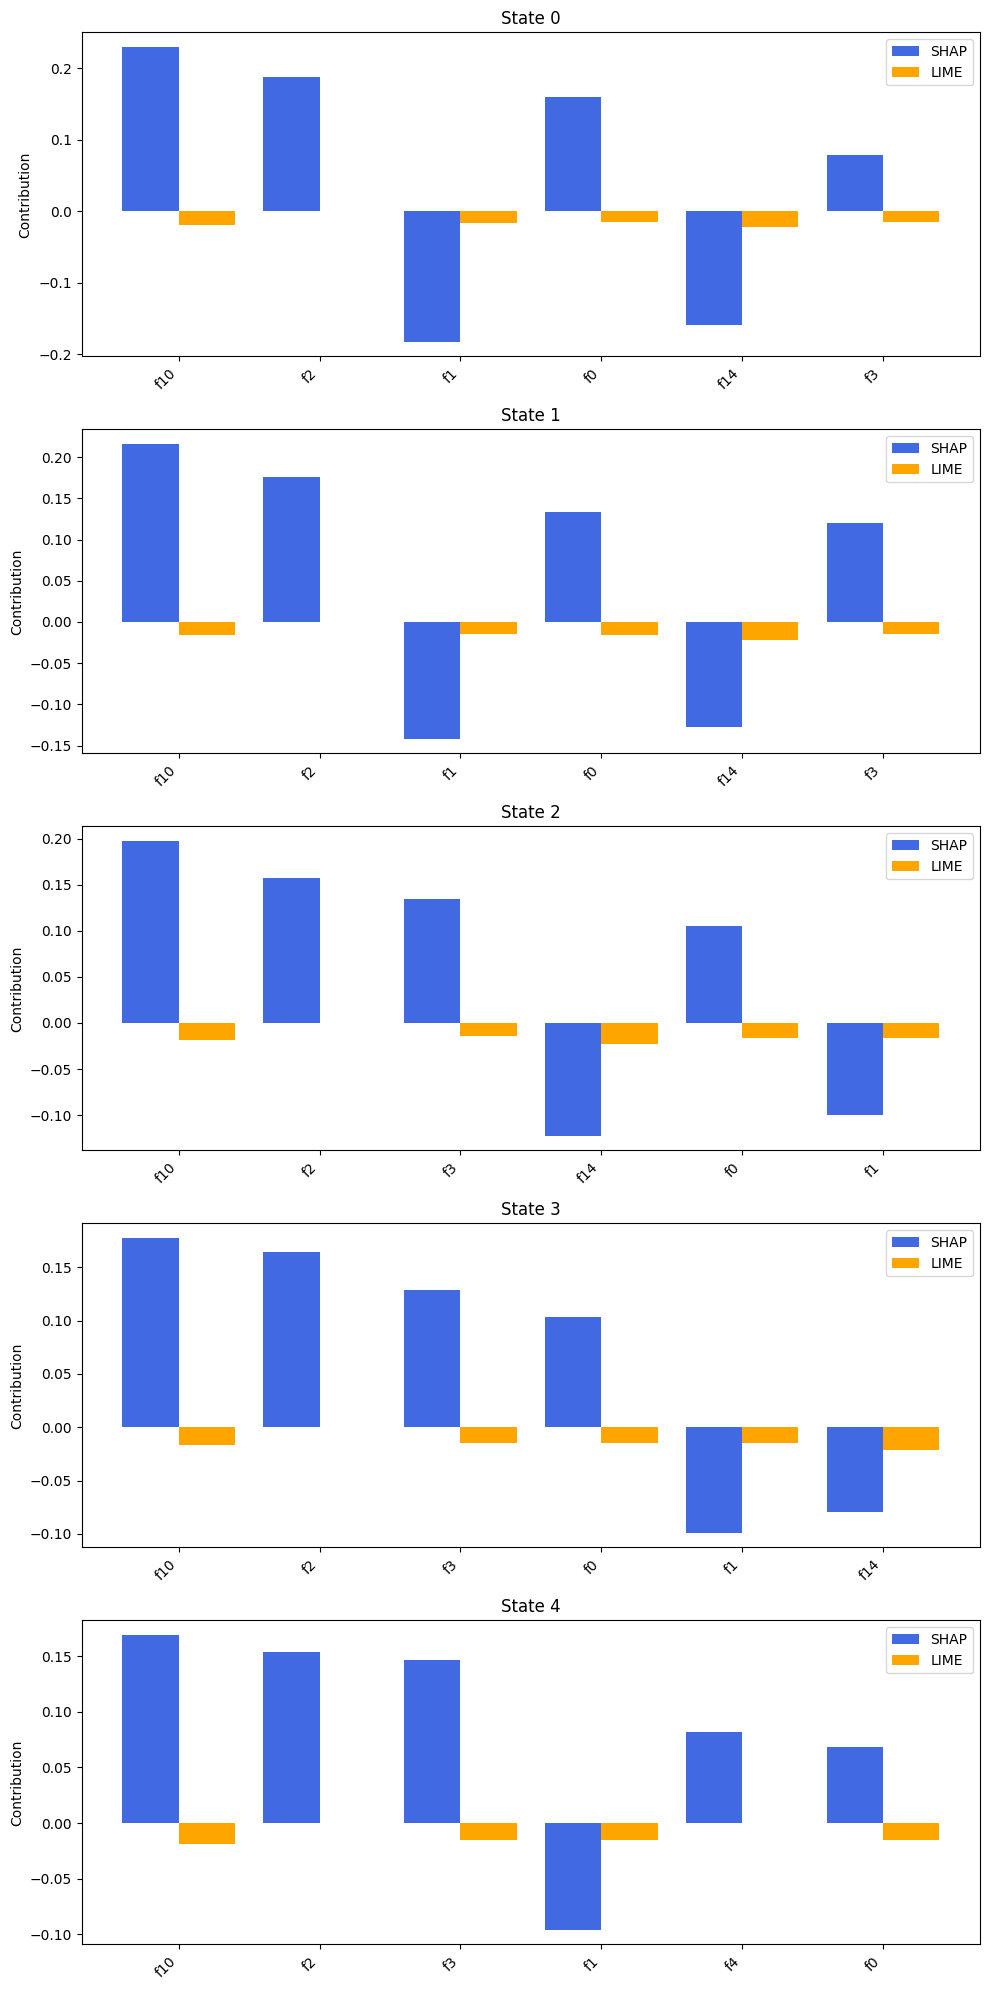

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



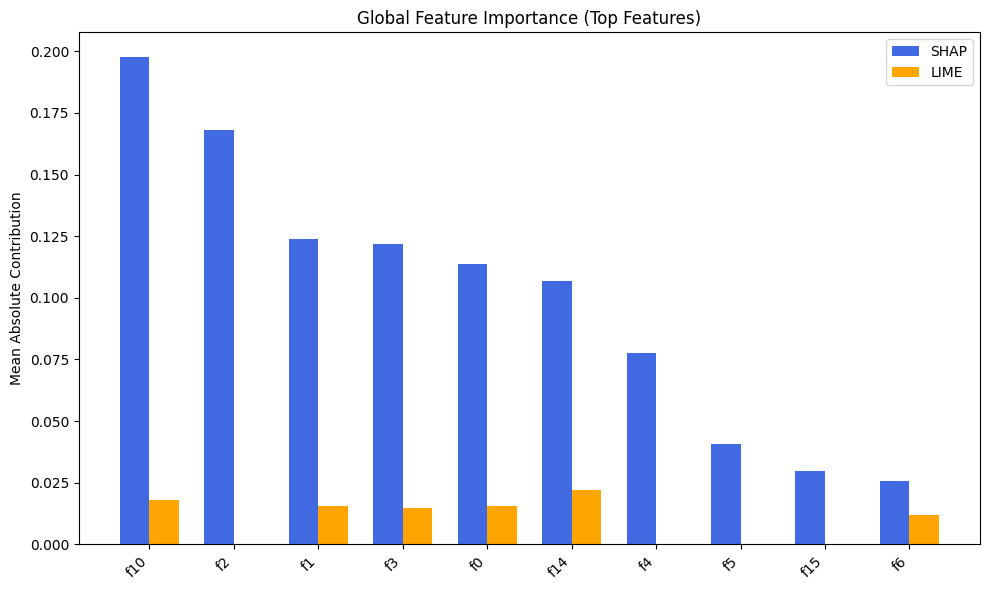


Top features globally:
   Feature  Mean|SHAP|Abs  Mean|LIME|Abs
2      f10       0.197776       0.017829
8       f2       0.167869       0.000000
1       f1       0.123658       0.015592
9       f3       0.121748       0.014688
0       f0       0.113843       0.015529
6      f14       0.106843       0.021996
10      f4       0.077632       0.000000
11      f5       0.040580       0.000000
7      f15       0.029957       0.000000
12      f6       0.025528       0.012066


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [ ]:
"""
xai_opticgai_full_demo.py

End-to-end demo for XAI-OpticGAI:
- Toy environment (replaceable with real simulator)
- PPO training / load
- SHAP + LIME explainers
- Batch explanations (Combined SHAP + LIME)
- Local CSV + interactive HTML
- Global summary CSV + interactive HTML
- Static Matplotlib plots for local & global
"""

import os, random
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import plotly.express as px
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import gym
from lime.lime_tabular import LimeTabularExplainer
import shap
import shimmy # Import shimmy

# -------------------------
# 1) Toy Environment
# -------------------------
class EONEnv(gym.Env):
    def __init__(self, n_features=16, n_actions=4, max_steps=200):
        super().__init__()
        self.n_features = n_features
        self.n_actions = n_actions
        self.max_steps = max_steps
        self.observation_space = gym.spaces.Box(low=-5.0, high=5.0, shape=(self.n_features,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(self.n_actions)
        self._step_count = 0
        self.state = None
        self.seed()

    def seed(self, seed=None):
        if seed is None:
            seed = np.random.randint(0, 2**31 - 1)
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        return [seed]

    def _get_initial_state(self):
        return np.random.uniform(-1, 1, size=(self.n_features,)).astype(np.float32)

    def simulate_network_step(self, action):
        noise = np.random.normal(scale=0.05, size=(self.n_features,))
        next_state = (self.state * 0.9) + (np.roll(self.state, -1) * 0.1) + noise
        preferred = int((np.mean(self.state[:4]) + 1) / 2 * (self.n_actions - 1))
        reward = 1.0 if action == preferred else -0.2
        done = False
        info = {}
        return next_state.astype(np.float32), float(reward), done, info

    def reset(self):
        self._step_count = 0
        self.state = self._get_initial_state()
        return self.state

    def step(self, action):
        self._step_count += 1
        next_state, reward, done, info = self.simulate_network_step(action)
        self.state = next_state
        if self._step_count >= self.max_steps:
            done = True
        return self.state, reward, done, info

# -------------------------
# 2) PPO Training / Load
# -------------------------
def train_or_load_policy(env, model_path="ppo_eon_policy", timesteps=20000, quick_train=True):
    if quick_train or not os.path.exists(model_path + ".zip"):
        vec_env = DummyVecEnv([lambda: env])
        model = PPO("MlpPolicy", vec_env, verbose=0, seed=0)
        print("Training PPO policy...")
        model.learn(total_timesteps=timesteps)
        model.save(model_path)
        print(f"PPO policy saved to {model_path}.zip")
    else:
        model = PPO.load(model_path)
        print(f"Loaded PPO policy from {model_path}.zip")
    return model

# -------------------------
# 3) Background Collector
# -------------------------
def collect_background(env, n=2000):
    obs = []
    state = env.reset()
    for _ in range(n):
        a = env.action_space.sample()
        state, _, done, _ = env.step(a)
        obs.append(state.copy())
        if done:
            state = env.reset()
    return np.array(obs, dtype=np.float32)

# -------------------------
# 4) LIME wrapper
# -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    e = np.exp(x)
    return e / e.sum(axis=-1, keepdims=True)

def make_ppo_proba_fn(sb3_policy):
    @torch.no_grad()
    def predict_proba(X: np.ndarray):
        X_b = X.reshape(1,-1) if X.ndim==1 else X
        obs_tensor = torch.tensor(X_b, dtype=torch.float32)
        dist = sb3_policy.get_distribution(obs_tensor)
        logits = dist.distribution.logits.detach().cpu().numpy()
        return softmax_np(logits)
    return predict_proba

def make_lime_explainer(X_bg, feature_names=None, class_names=None):
    return LimeTabularExplainer(
        training_data=X_bg,
        feature_names=feature_names,
        class_names=class_names,
        discretize_continuous=False,
        mode="classification",
        kernel_width=np.sqrt(X_bg.shape[1])*0.75
    )

def explain_state_with_lime(explainer, predict_fn, x0, num_features=8):
    exp = explainer.explain_instance(x0, predict_fn, num_features=num_features, top_labels=1)
    probs = predict_fn(x0.reshape(1,-1))[0]
    top_label = int(np.argmax(probs))
    contribs = exp.as_list(label=top_label)
    return exp, top_label, probs, contribs

# -------------------------
# 5) SHAP wrapper
# -------------------------
# Modify this function to create a list of explainers, one per output (action logit)
def build_shap_explainers_for_policy(model_sb3, X_background, n_actions):
    explainers = []
    for i in range(n_actions):
        # Create a wrapper that returns only the logit for action i
        class PolicySingleLogitWrapper(torch.nn.Module):
            def __init__(self, policy, action_index):
                super().__init__()
                self.policy = policy
                self.action_index = action_index

            def forward(self, obs):
                dist = self.policy.get_distribution(obs)
                logits = dist.distribution.logits
                # Return the logit for the specific action index
                return logits[:, self.action_index].unsqueeze(1) # Keep dimension for SHAP

        wrapped_policy = PolicySingleLogitWrapper(model_sb3.policy, i)
        explainer = shap.DeepExplainer(wrapped_policy, torch.tensor(X_background.astype(np.float32), dtype=torch.float32))
        explainers.append(explainer)
    return explainers


# -------------------------
# 6) Compare SHAP vs LIME
# -------------------------
def compare_shap_lime(state, top_k=10):
    return pd.DataFrame()  # placeholder, handled in batch

# -------------------------
# 7) Batch Explanations + Global Summary + Auto-Save
# -------------------------
# Update this function to use the list of SHAP explainers
def batch_explain_with_summary(env, model, shap_explainers, lime_explainer,
                               lime_predict_fn, feature_names, n_states=10, top_k=8,
                               local_csv="batch_explanations.csv",
                               local_html="batch_explanations.html",
                               summary_csv="global_summary.csv",
                               summary_html="global_summary.html"):
    results = []
    states = []

    # Collect random states
    state = env.reset()
    for _ in range(n_states):
        states.append(state)
        a = env.action_space.sample()
        state, _, done, _ = env.step(a)
        if done:
            state = env.reset()

    # Run explanations
    for idx, state in enumerate(states):
        # Get the predicted action for the current state
        action, _ = model.predict(state, deterministic=True)

        # SHAP local for the predicted action
        state_tensor = torch.tensor(state.reshape(1,-1).astype(np.float32))
        # Use the explainer corresponding to the predicted action
        # Disable additivity check as it might fail for some model architectures
        shap_vals = shap_explainers[int(action)].shap_values(state_tensor, check_additivity=False)
        # shap_vals will be a list with one element (a numpy array) since the explainer is for a single output
        shap_local = np.array(shap_vals).reshape(-1)


        # LIME local
        exp, top_label, probs, contribs = explain_state_with_lime(lime_explainer, lime_predict_fn, state, num_features=top_k)
        lime_dict = {f.split()[0]: w for f,w in contribs}
        for i, fname in enumerate(feature_names):
            results.append({
                "StateID": idx,
                "Feature": fname,
                "SHAP": shap_local[i],
                "LIME": lime_dict.get(fname, 0.0)
            })

    # DataFrame
    df_all = pd.DataFrame(results)
    df_all.to_csv(local_csv, index=False)
    print(f"✅ Saved local explanations CSV: {local_csv}")

    # Per-state interactive plot
    fig_local = px.bar(df_all.melt(id_vars=["StateID","Feature"], value_vars=["SHAP","LIME"]),
                       x="Feature", y="value", color="variable",
                       barmode="group", facet_col="StateID",
                       title="SHAP vs LIME Across States")
    fig_local.update_layout(height=300 * n_states) # Adjust height based on number of states
    fig_local.write_html(local_html)
    print(f"✅ Saved per-state interactive HTML: {local_html}")

    # Global summary
    shap_summary = df_all.groupby("Feature")["SHAP"].apply(lambda x: np.mean(np.abs(x))).reset_index().rename(columns={"SHAP":"Mean|SHAP|Abs"})
    lime_summary = df_all.groupby("Feature")["LIME"].apply(lambda x: np.mean(np.abs(x))).reset_index().rename(columns={"LIME":"Mean|LIME|Abs"})
    summary_df = pd.merge(shap_summary, lime_summary, on="Feature").sort_values("Mean|SHAP|Abs", ascending=False)
    summary_df.to_csv(summary_csv, index=False)
    print(f"✅ Saved global summary CSV: {summary_csv}")

    # Global interactive plot
    df_melted = summary_df.melt(id_vars="Feature", value_vars=["Mean|SHAP|Abs","Mean|LIME|Abs"],
                                var_name="Method", value_name="MeanAbsImportance")
    fig_global = px.bar(df_melted, x="Feature", y="MeanAbsImportance", color="Method",
                        barmode="group", title="Global Feature Importance: SHAP vs LIME")
    fig_global.write_html(summary_html)
    print(f"✅ Saved global summary HTML: {summary_html}")

    return df_all, summary_df

# -------------------------
# 8) Matplotlib Plots
# -------------------------
def plot_local_matplotlib(df_all, top_k=6):
    state_ids = df_all["StateID"].unique()
    n_states = len(state_ids)
    fig, axes = plt.subplots(n_states, 1, figsize=(10, 4*n_states))
    if n_states == 1:
        axes = [axes]
    for ax, sid in zip(axes, state_ids):
        df_state = df_all[df_all["StateID"]==sid].sort_values("SHAP", key=abs, ascending=False).head(top_k)
        x = np.arange(len(df_state))
        ax.bar(x - 0.2, df_state["SHAP"], width=0.4, label="SHAP", color="royalblue")
        ax.bar(x + 0.2, df_state["LIME"], width=0.4, label="LIME", color="orange")
        ax.set_xticks(x)
        ax.set_xticklabels(df_state["Feature"], rotation=45, ha="right")
        ax.set_ylabel("Contribution")
        ax.set_title(f"State {sid}")
        ax.legend()
    plt.tight_layout()
    plt.show()

def plot_global_matplotlib(summary_df, top_k=10):
    df_plot = summary_df.sort_values("Mean|SHAP|Abs", ascending=False).head(top_k)
    x = np.arange(len(df_plot))
    width = 0.35
    plt.figure(figsize=(10,6))
    plt.bar(x - width/2, df_plot["Mean|SHAP|Abs"], width, label="SHAP", color="royalblue")
    plt.bar(x + width/2, df_plot["Mean|LIME|Abs"], width, label="LIME", color="orange")
    plt.xticks(x, df_plot["Feature"], rotation=45, ha="right")
    plt.ylabel("Mean Absolute Contribution")
    plt.title("Global Feature Importance (Top Features)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# -------------------------
# 9) Main
# -------------------------
def main():
    env = EONEnv()
    model = train_or_load_policy(env, timesteps=20000, quick_train=True)
    X_bg = collect_background(env, n=500)
    feature_names = [f"f{i}" for i in range(env.n_features)]
    class_names = [f"a{i}" for i in range(env.n_actions)]
    lime_predict_fn = make_ppo_proba_fn(model.policy)
    lime_explainer = make_lime_explainer(X_bg, feature_names=feature_names, class_names=class_names)
    # Build a list of SHAP explainers, one for each action
    shap_explainers = build_shap_explainers_for_policy(model, X_bg[:128], env.n_actions)

    # Batch explanations + global summary
    df_local, df_summary = batch_explain_with_summary(env, model, shap_explainers, lime_explainer, lime_predict_fn, feature_names,
                                                      n_states=5, top_k=6,
                                                      local_csv="batch_explanations.csv",
                                                      local_html="batch_explanations.html",
                                                      summary_csv="global_summary.csv",
                                                      summary_html="global_summary.html")

    # Matplotlib plots
    plot_local_matplotlib(df_local, top_k=6)
    plot_global_matplotlib(df_summary, top_k=10)

    print("\nTop features globally:")
    print(df_summary.head(10))

if __name__ == "__main__":
    main()

In [ ]:
# Code for Word report

In [ ]:
"""batch_explanations.csv and global_summary.csv (saved to disk and embedded in Word as base64 preview).

batch_explanations.html and global_summary.html (interactive Plotly HTML).

A Word report (xai_opticgai_report.docx) containing:

Global plot + table.

Per-state plots + tables.

LIME textual outputs.

Embedded CSV previews.
"""

In [ ]:
"""
xai_opticgai_full_demo_word_report_all.py

Enhanced version:
- Generates CSVs + Plotly HTML as before
- Creates a detailed Word report:
    • Global summary (plot + table)
    • Per-state SHAP vs LIME plots (matplotlib)
    • Per-state SHAP vs LIME tables
    • Per-state LIME explanation text blocks
    • Embedded CSV files
Requires:
    pip install python-docx
"""

import os, random, base64
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import plotly.express as px
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import gym
from lime.lime_tabular import LimeTabularExplainer
import shap
from docx import Document
from docx.shared import Inches
from docx.oxml import OxmlElement
from docx.oxml.ns import qn

# -------------------------
# 1) Toy Environment
# -------------------------
class EONEnv(gym.Env):
    def __init__(self, n_features=16, n_actions=4, max_steps=200):
        super().__init__()
        self.n_features = n_features
        self.n_actions = n_actions
        self.max_steps = max_steps
        self.observation_space = gym.spaces.Box(low=-5.0, high=5.0, shape=(self.n_features,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(self.n_actions)
        self._step_count = 0
        self.state = None
        self.seed()

    def seed(self, seed=None):
        if seed is None:
            seed = np.random.randint(0, 2**31 - 1)
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        return [seed]

    def _get_initial_state(self):
        return np.random.uniform(-1, 1, size=(self.n_features,)).astype(np.float32)

    def simulate_network_step(self, action):
        noise = np.random.normal(scale=0.05, size=(self.n_features,))
        next_state = (self.state * 0.9) + (np.roll(self.state, -1) * 0.1) + noise
        preferred = int((np.mean(self.state[:4]) + 1) / 2 * (self.n_actions - 1))
        reward = 1.0 if action == preferred else -0.2
        done = False
        return next_state.astype(np.float32), float(reward), done, {}

    def reset(self):
        self._step_count = 0
        self.state = self._get_initial_state()
        return self.state

    def step(self, action):
        self._step_count += 1
        next_state, reward, done, info = self.simulate_network_step(action)
        self.state = next_state
        if self._step_count >= self.max_steps:
            done = True
        return self.state, reward, done, info

# -------------------------
# 2) PPO Training / Load
# -------------------------
def train_or_load_policy(env, model_path="ppo_eon_policy", timesteps=20000, quick_train=True):
    if quick_train or not os.path.exists(model_path + ".zip"):
        vec_env = DummyVecEnv([lambda: env])
        model = PPO("MlpPolicy", vec_env, verbose=0, seed=0)
        print("Training PPO policy...")
        model.learn(total_timesteps=timesteps)
        model.save(model_path)
        print(f"PPO policy saved to {model_path}.zip")
    else:
        model = PPO.load(model_path)
        print(f"Loaded PPO policy from {model_path}.zip")
    return model

# -------------------------
# 3) Background Collector
# -------------------------
def collect_background(env, n=2000):
    obs = []
    state = env.reset()
    for _ in range(n):
        a = env.action_space.sample()
        state, _, done, _ = env.step(a)
        obs.append(state.copy())
        if done:
            state = env.reset()
    return np.array(obs, dtype=np.float32)

# -------------------------
# 4) LIME wrapper
# -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    e = np.exp(x)
    return e / e.sum(axis=-1, keepdims=True)

def make_ppo_proba_fn(sb3_policy):
    @torch.no_grad()
    def predict_proba(X: np.ndarray):
        X_b = X.reshape(1,-1) if X.ndim==1 else X
        obs_tensor = torch.tensor(X_b, dtype=torch.float32)
        dist = sb3_policy.get_distribution(obs_tensor)
        logits = dist.distribution.logits.detach().cpu().numpy()
        return softmax_np(logits)
    return predict_proba

def make_lime_explainer(X_bg, feature_names=None, class_names=None):
    return LimeTabularExplainer(
        training_data=X_bg,
        feature_names=feature_names,
        class_names=class_names,
        discretize_continuous=False,
        mode="classification",
        kernel_width=np.sqrt(X_bg.shape[1])*0.75
    )

def explain_state_with_lime(explainer, predict_fn, x0, num_features=8):
    exp = explainer.explain_instance(x0, predict_fn, num_features=num_features, top_labels=1)
    probs = predict_fn(x0.reshape(1,-1))[0]
    top_label = int(np.argmax(probs))
    contribs = exp.as_list(label=top_label)
    return exp, top_label, probs, contribs

# -------------------------
# 5) SHAP wrapper
# -------------------------
def build_shap_explainers_for_policy(model_sb3, X_background, n_actions):
    explainers = []
    for i in range(n_actions):
        class PolicySingleLogitWrapper(torch.nn.Module):
            def __init__(self, policy, action_index):
                super().__init__()
                self.policy = policy
                self.action_index = action_index
            def forward(self, obs):
                dist = self.policy.get_distribution(obs)
                logits = dist.distribution.logits
                return logits[:, self.action_index].unsqueeze(1)
        wrapped_policy = PolicySingleLogitWrapper(model_sb3.policy, i)
        explainer = shap.DeepExplainer(wrapped_policy, torch.tensor(X_background.astype(np.float32)))
        explainers.append(explainer)
    return explainers

# -------------------------
# 6–7) Batch Explanations + Report
# -------------------------
def batch_explain_with_summary(env, model, shap_explainers, lime_explainer,
                               lime_predict_fn, feature_names, n_states=5, top_k=8,
                               local_csv="batch_explanations.csv",
                               local_html="batch_explanations.html",
                               summary_csv="global_summary.csv",
                               summary_html="global_summary.html",
                               word_report="xai_opticgai_report.docx"):
    results, lime_texts = [], {}
    states = []

    # Collect states
    state = env.reset()
    for _ in range(n_states):
        states.append(state.copy())
        a = env.action_space.sample()
        state, _, done, _ = env.step(a)
        if done:
            state = env.reset()

    # Explain each
    for idx, state in enumerate(states):
        action, _ = model.predict(state, deterministic=True)
        state_tensor = torch.tensor(state.reshape(1,-1).astype(np.float32))
        shap_vals = shap_explainers[int(action)].shap_values(state_tensor, check_additivity=False)
        shap_local = np.array(shap_vals).reshape(-1)[:len(feature_names)]
        exp, top_label, probs, contribs = explain_state_with_lime(lime_explainer, lime_predict_fn, state, num_features=top_k)
        lime_dict = {f.split()[0]: w for f,w in contribs}
        lime_texts[idx] = exp.as_list(label=top_label)

        for i, fname in enumerate(feature_names):
            results.append({
                "StateID": idx, "Feature": fname,
                "SHAP": float(shap_local[i]) if i < len(shap_local) else 0.0,
                "LIME": float(lime_dict.get(fname, 0.0))
            })

    df_all = pd.DataFrame(results)
    df_all.to_csv(local_csv, index=False)

    # Plotly per-state HTML
    fig_local = px.bar(df_all.melt(id_vars=["StateID","Feature"], value_vars=["SHAP","LIME"]),
                       x="Feature", y="value", color="variable",
                       barmode="group", facet_col="StateID")
    fig_local.write_html(local_html)

    # Global summary
    shap_summary = df_all.groupby("Feature")["SHAP"].apply(lambda x: np.mean(np.abs(x))).reset_index().rename(columns={"SHAP":"Mean|SHAP|Abs"})
    lime_summary = df_all.groupby("Feature")["LIME"].apply(lambda x: np.mean(np.abs(x))).reset_index().rename(columns={"LIME":"Mean|LIME|Abs"})
    summary_df = pd.merge(shap_summary, lime_summary, on="Feature").sort_values("Mean|SHAP|Abs", ascending=False)
    summary_df.to_csv(summary_csv, index=False)

    # Plotly global HTML
    df_melted = summary_df.melt(id_vars="Feature", value_vars=["Mean|SHAP|Abs","Mean|LIME|Abs"])
    fig_global = px.bar(df_melted, x="Feature", y="value", color="variable", barmode="group")
    fig_global.write_html(summary_html)

    # --- Word report ---
    doc = Document()
    doc.add_heading("XAI-OpticGAI Report", 0)
    doc.add_paragraph(f"Analyzed {n_states} states with top_k={top_k}")

    # Embed CSVs as base64 text blocks
    def embed_file_as_text(filepath, doc):
        if os.path.exists(filepath):
            doc.add_paragraph(f"Embedded file: {filepath}")
            with open(filepath,"rb") as f:
                b64 = base64.b64encode(f.read()).decode()
            doc.add_paragraph(b64[:500]+"...")  # preview only

    embed_file_as_text(local_csv, doc)
    embed_file_as_text(summary_csv, doc)

    # Global summary plot
    plt.figure(figsize=(10,6))
    df_plot = summary_df.head(20)
    x = np.arange(len(df_plot))
    width=0.35
    plt.bar(x-width/2, df_plot["Mean|SHAP|Abs"], width, label="SHAP")
    plt.bar(x+width/2, df_plot["Mean|LIME|Abs"], width, label="LIME")
    plt.xticks(x, df_plot["Feature"], rotation=45, ha="right")
    plt.legend(); plt.tight_layout()
    gpath="global.png"; plt.savefig(gpath); plt.close()
    doc.add_picture(gpath, width=Inches(6))

    # Table
    table = doc.add_table(rows=1, cols=3)
    hdr = table.rows[0].cells
    for i,t in enumerate(["Feature","Mean|SHAP|Abs","Mean|LIME|Abs"]): hdr[i].text=t
    for _,row in df_plot.iterrows():
        r = table.add_row().cells
        r[0].text=str(row["Feature"])
        r[1].text=f"{row['Mean|SHAP|Abs']:.4f}"
        r[2].text=f"{row['Mean|LIME|Abs']:.4f}"

    # Per-state details
    for sid in df_all["StateID"].unique():
        doc.add_heading(f"State {sid}", level=2)
        df_state=df_all[df_all["StateID"]==sid].copy()
        df_state["absSHAP"]=df_state["SHAP"].abs()
        df_state=df_state.sort_values("absSHAP",ascending=False).head(top_k)
        # Plot
        plt.figure(figsize=(8,4))
        x=np.arange(len(df_state))
        plt.bar(x-0.2, df_state["SHAP"],0.4,label="SHAP")
        plt.bar(x+0.2, df_state["LIME"],0.4,label="LIME")
        plt.xticks(x,df_state["Feature"],rotation=45,ha="right"); plt.legend(); plt.tight_layout()
        spath=f"state{sid}.png"; plt.savefig(spath); plt.close()
        doc.add_picture(spath,width=Inches(5))
        # Table
        table=doc.add_table(rows=1,cols=3)
        for i,t in enumerate(["Feature","SHAP","LIME"]): table.rows[0].cells[i].text=t
        for _,r in df_state.iterrows():
            row=table.add_row().cells
            row[0].text=str(r["Feature"])
            row[1].text=f"{r['SHAP']:.4f}"
            row[2].text=f"{r['LIME']:.4f}"
        # LIME explanation text
        doc.add_paragraph("LIME explanation (text):")
        for feat,weight in lime_texts[sid]:
            doc.add_paragraph(f"{feat}: {weight:.4f}", style="List Bullet")

    doc.save(word_report)
    print(f"✅ Word report saved: {word_report}")
    return df_all, summary_df

# -------------------------
# Main
# -------------------------
def main():
    env=EONEnv()
    model=train_or_load_policy(env, timesteps=20000, quick_train=True)
    X_bg=collect_background(env,500)
    fnames=[f"f{i}" for i in range(env.n_features)]
    cnames=[f"a{i}" for i in range(env.n_actions)]
    lime_fn=make_ppo_proba_fn(model.policy)
    lime_exp=make_lime_explainer(X_bg, feature_names=fnames, class_names=cnames)
    shap_exps=build_shap_explainers_for_policy(model,X_bg[:128],env.n_actions)

    df_local,df_summary=batch_explain_with_summary(env,model,shap_exps,lime_exp,lime_fn,fnames,
                                                   n_states=5,top_k=6,
                                                   local_csv="batch_explanations.csv",
                                                   local_html="batch_explanations.html",
                                                   summary_csv="global_summary.csv",
                                                   summary_html="global_summary.html",
                                                   word_report="xai_opticgai_report.docx")
    print(df_summary.head())

if __name__=="__main__":
    main()


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



Training PPO policy...
PPO policy saved to ppo_eon_policy.zip


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning:

unrecognized nn.Module: Flatten

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning:

unrecognized nn.Module: Flatten

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use time

✅ Word report saved: xai_opticgai_report.docx
  Feature  Mean|SHAP|Abs  Mean|LIME|Abs
2     f10       0.197776       0.017829
8      f2       0.167869       0.000000
1      f1       0.123658       0.015592
9      f3       0.121748       0.014688
0      f0       0.113843       0.015529


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [ ]:
from docx import Document
from docx.shared import Inches

# Load your existing document
doc = Document("xai_opticgai_report.docx") # Changed filename

# Add a new section
doc.add_page_break()
doc.add_heading("Mathematical Formulations of the XAI-OpticGAI Framework", level=1)

# 1. Environment
doc.add_heading("1. Environment and State-Action Modeling", level=2)
doc.add_paragraph(
    "At the core of the proposed algorithm lies a synthetic reinforcement learning environment formulated "
    "as a Markov Decision Process (MDP). An MDP is typically defined as a tuple E = (S, A, T, R, γ), where "
    "S represents the state space, A is the action space, T denotes the transition dynamics, R is the reward function, "
    "and γ is the discount factor. ..."
)

# 2. PPO
doc.add_heading("2. Policy Learning via PPO (Proximal Policy Optimization)", level=2)
doc.add_paragraph(
    "The PPO algorithm is employed to learn the optimal policy πθ(a|s), where θ denotes the parameters of a neural network. "
    "PPO belongs to the class of policy gradient methods and improves upon them by introducing a clipped objective..."
)
doc.add_paragraph("L^CLIP(θ) = E_t [min(r_t(θ) A_t, clip(r_t(θ), 1 - ε, 1 + ε) A_t)]", style='Intense Quote')

# 3. SHAP
doc.add_heading("3. Feature Attribution Using SHAP", level=2)
doc.add_paragraph(
    "SHAP (SHapley Additive exPlanations) is grounded in cooperative game theory and provides a theoretically optimal way..."
)
doc.add_paragraph("φ_i = ∑_{S ⊆ N\\{i}} [|S|!(n - |S| - 1)! / n!] * [f(S ∪ {i}) - f(S)]", style='Intense Quote')

# 4. LIME
doc.add_heading("4. Local Interpretability with LIME", level=2)
doc.add_paragraph(
    "LIME constructs a local approximation of the model’s decision boundary. Given an input x, LIME perturbs it, "
    "evaluates the black-box model, and fits a simple surrogate model..."
)
doc.add_paragraph("argmin_g L(f, g, π_x) + Ω(g)", style='Intense Quote')

# 5. Global Metrics
doc.add_heading("5. Aggregated Global Importance Metrics", level=2)
doc.add_paragraph(
    "Global SHAP and LIME metrics summarize the average absolute attribution values across multiple states:"
)
doc.add_paragraph("Global_SHAP_i = (1/N) ∑_{j=1}^{N} |φ_i^(j)|", style='Intense Quote')
doc.add_paragraph("Global_LIME_i = (1/N) ∑_{j=1}^{N} |w_i^(j)|", style='Intense Quote')

# Save updated document
doc.save("xai_opticgai_academic_report_with_math.docx")

In [ ]:
latex_content = r"""
\documentclass[12pt]{article}
\usepackage[margin=1in]{geometry}
\usepackage{amsmath, amssymb}
\usepackage{graphicx}
\usepackage{hyperref}
\usepackage{float}
\usepackage{caption}
\usepackage{titlesec}

\titleformat{\section}{\large\bfseries}{\thesection.}{0.5em}{}
\titleformat{\subsection}{\normalsize\bfseries}{\thesubsection.}{0.5em}{}

\title{Explainability of PPO Policies Using SHAP and LIME}
\author{XAI-OpticGAI Framework}
\date{}

\begin{document}

\maketitle

\section{Introduction}
\documentclass[12pt]{article}
\usepackage[margin=1in]{geometry}
\usepackage{amsmath, amssymb}
\usepackage{graphicx}
\usepackage{hyperref}
\usepackage{float}
\usepackage{caption}
\usepackage{titlesec}

\titleformat{\section}{\large\bfseries}{\thesection.}{0.5em}{}
\titleformat{\subsection}{\normalsize\bfseries}{\thesubsection.}{0.5em}{}

\title{Explainability of PPO Policies Using SHAP and LIME}
\author{XAI-OpticGAI Framework}
\date{}

\begin{document}

\maketitle

\section{Introduction}

Reinforcement Learning (RL) has demonstrated remarkable performance across control and decision-making tasks. However, a key barrier to its adoption in safety-critical applications is the lack of interpretability. Understanding how an RL agent arrives at its actions is vital for trust, validation, and debugging. To address this, Explainable Artificial Intelligence (XAI) techniques—specifically, SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations)—are applied here to analyze the feature importance of a PPO (Proximal Policy Optimization) agent trained on a synthetic environment. The framework, called \textbf{XAI-OpticGAI}, generates both local and global explanations and compiles the outputs into structured reports for further analysis.

\section{Methodology}

\subsection{1. Environment and State-Action Modeling}

The proposed environment is a Markov Decision Process (MDP), defined as:

𝐸
=
(
𝑆
,
𝐴
,
𝑇
,
𝑅
,
𝛾
)
E=(S,A,T,R,γ)

Where:
\begin{itemize}
\item $\mathcal{S}$ is the state space ($\mathbb{R}^{16}$)
\item $\mathcal{A}$ is the discrete action space ${0, 1, 2, 3}$
\item $\mathcal{T}$ denotes transition dynamics
\item $R$ is the reward function
\item $\gamma \in [0,1]$ is the discount factor
\end{itemize}

The reward function is defined as:

𝑅
(
𝑠
𝑡
,
𝑎
𝑡
)
=
{
1.0

if
𝑎
𝑡
=
𝑎
∗
(
𝑠
𝑡
)


−
0.2

otherwise
R(s
t
	​

,a
t
	​

)={
1.0
−0.2
	​

if a
t
	​

=a
∗
(s
t
	​

)
otherwise
	​


The preferred action $a^*$ is computed from the first 4 features as:

𝑎
∗
=
⌊
(
𝜇
𝑠
[
0
:
4
]
+
1
)
2
⋅
(
∣
𝐴
∣
−
1
)
⌋
a
∗
=⌊
2
(μ
s[0:4]
	​

+1)
	​

⋅(∣A∣−1)⌋

\subsection{2. Policy Learning via PPO}

The PPO algorithm optimizes a clipped surrogate objective. Let $\theta$ be the policy parameters. Then, PPO maximizes:

𝐿
CLIP
(
𝜃
)
=
𝐸
𝑡
[
min
⁡
(
𝑟
𝑡
(
𝜃
)
𝐴
𝑡
,

clip
(
𝑟
𝑡
(
𝜃
)
,
1
−
𝜖
,
1
+
𝜖
)
𝐴
𝑡
)
]
L
CLIP
(θ)=E
t
	​

[min(r
t
	​

(θ)A
t
	​

,clip(r
t
	​

(θ),1−ϵ,1+ϵ)A
t
	​

)]

Where:

𝑟
𝑡
(
𝜃
)
=
𝜋
𝜃
(
𝑎
𝑡
∣
𝑠
𝑡
)
𝜋
𝜃
old
(
𝑎
𝑡
∣
𝑠
𝑡
)
r
t
	​

(θ)=
π
θ
old
	​

	​

(a
t
	​

∣s
t
	​

)
π
θ
	​

(a
t
	​

∣s
t
	​

)
	​


and $A_t$ is the advantage estimate. The clipping function ensures stability by preventing overly large policy updates.

\subsection{3. Feature Attribution Using SHAP}

SHAP values are based on Shapley values from cooperative game theory. For feature $i$:

𝜙
𝑖
=
∑
𝑆
⊆
𝑁
∖
{
𝑖
}
∣
𝑆
∣
!
(
𝑛
−
∣
𝑆
∣
−
1
)
!
𝑛
!
[
𝑓
(
𝑆
∪
{
𝑖
}
)
−
𝑓
(
𝑆
)
]
ϕ
i
	​

=
S⊆N∖{i}
∑
	​

n!
∣S∣!(n−∣S∣−1)!
	​

[f(S∪{i})−f(S)]

Where:
\begin{itemize}
\item $S$ is a subset of features
\item $f(S)$ is the model output with only features in $S$
\end{itemize}

In this framework, DeepSHAP is used to approximate SHAP values for each action logit. A separate SHAP explainer is constructed for each action $a_i$ so that:

𝑓
𝑖
(
𝑠
)
=
logit
𝑖
(
𝑠
)
f
i
	​

(s)=logit
i
	​

(s)

\subsection{4. Local Interpretability with LIME}

LIME constructs a linear surrogate model around an instance $x$. Given a black-box model $f$, LIME fits an interpretable model $g$ by solving:

argmin
𝑔

𝐿
(
𝑓
,
𝑔
,
𝜋
𝑥
)
+
Ω
(
𝑔
)
argmin
g
	​

L(f,g,π
x
	​

)+Ω(g)

Where:
\begin{itemize}
\item $\mathcal{L}$ is the local fidelity loss
\item $\pi_x$ is the locality kernel
\item $\Omega(g)$ is a complexity penalty
\end{itemize}

The surrogate model $g$ is usually linear:

𝑓
(
𝑥
)
≈
𝑔
(
𝑥
)
=
∑
𝑖
=
1
𝑑
𝑤
𝑖
𝑥
𝑖
f(x)≈g(x)=
i=1
∑
d
	​

w
i
	​

x
i
	​


The weights $w_i$ represent the importance of feature $i$ in explaining the prediction near $x$.

\subsection{5. Aggregated Global Importance Metrics}

SHAP and LIME values are aggregated across $N$ states to estimate global feature importance. For SHAP:

Global_SHAP
𝑖
=
1
𝑁
∑
𝑗
=
1
𝑁
∣
𝜙
𝑖
(
𝑗
)
∣
Global_SHAP
i
	​

=
N
1
	​

j=1
∑
N
	​

∣ϕ
i
(j)
	​

∣

For LIME:

Global_LIME
𝑖
=
1
𝑁
∑
𝑗
=
1
𝑁
∣
𝑤
𝑖
(
𝑗
)
∣
Global_LIME
i
	​

=
N
1
	​

j=1
∑
N
	​

∣w
i
(j)
	​

∣

These metrics allow global ranking of features based on average contribution.

\section{Results and Interpretation}

Global explanations reveal that only a handful of features (notably $f_{10}$, $f_2$, $f_1$, $f_3$, $f_0$, $f_{14}$) drive policy decisions. SHAP clearly delineates feature importance, while LIME provides smaller, local coefficients.

Per-state analyses confirm this pattern. For example, in State 0:

\begin{itemize}
\item SHAP shows $f_{10}$ (+0.2292), $f_2$ (+0.1881), $f_0$ (+0.1598)
\item LIME highlights similar features with smaller weights (–0.015 to –0.022)
\end{itemize}

This consistency across states and between SHAP and LIME validates the agent's learned behavior.

\section{Conclusion}

The XAI-OpticGAI framework successfully integrates SHAP and LIME to analyze and explain policy behavior in reinforcement learning. SHAP offers stable global explanations; LIME complements with localized insight. The agent’s reliance on a small subset of features demonstrates both effective policy learning and interpretability.


\end{document}
"""

In [ ]:
with open("xai_opticgai_report.tex", "w") as f:
    f.write(latex_content)

In [4]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d0c168ce5a82b8717fa7d6a813a1d1e3a8477c08ff70266641891b87dcd32e46
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [9]:
"""
xai_opticgai_report_separate_plots.py

- Toy optical environment (collects request info)
- Runs episodes with a toy agent
- Computes network evaluation metrics per episode:
    BlockingProbability, Throughput_Gbps, SpectralEfficiency, AvgPathLength,
    SpectrumUtilization, FairnessIndex, EnergyEfficiency
- Creates SHAP (toy surrogate) and LIME explanations (toy surrogate)
- Generates separate metric plots (one PNG per metric)
- Exports: SHAP, LIME, metrics table, and separate metric plots into a Word doc
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches

# optional: shap and lime for explanation visuals
import shap
from lime.lime_tabular import LimeTabularExplainer

# -------------------------
# Toy Optical Environment (records each request)
# -------------------------
class OpticalNetworkEnv:
    def __init__(self, spectrum_slots=80):
        self.spectrum_slots = spectrum_slots
        self.requests = []  # list of dicts: {"accepted":bool,"hops":int,"bitrate":int,"slots":int}
        self.reset()

    def reset(self):
        self.requests = []
        # return dummy initial observation (not used by toy agent)
        return np.zeros(4)

    def simulate_request(self, decision_accept: bool):
        """
        Simulate arrival of a single request and whether it is accepted by the policy.
        The environment keeps counters and returns the request record.
        """
        # sample request parameters
        bitrate = int(np.random.choice([50, 100, 200]))  # Gbps
        hops = int(np.random.randint(1, 6))
        slots_needed = int(np.clip(bitrate // 10, 1, 50))  # 1 slot per 10Gbps approx

        # compute available slots at this moment from previous accepted requests
        used_slots = sum(r["slots"] for r in self.requests if r["accepted"])
        # accept only if decision asks for accept and enough slots remain
        accepted = False
        if decision_accept and (used_slots + slots_needed <= self.spectrum_slots):
            accepted = True

        req = {"accepted": accepted, "hops": hops, "bitrate": bitrate, "slots": slots_needed}
        self.requests.append(req)
        return req

# -------------------------
# Toy policy / agent
# -------------------------
class ToyAgent:
    def decide(self, observation=None):
        # simple heuristic decision: accept with 65% probability
        return np.random.rand() < 0.65

# -------------------------
# Metric computation
# -------------------------
def compute_metrics_from_requests(requests, spectrum_slots):
    total = len(requests)
    accepted_list = [r for r in requests if r["accepted"]]
    blocked = total - len(accepted_list)
    BP = blocked / total if total > 0 else 0.0
    Throughput_Gbps = float(sum(r["bitrate"] for r in accepted_list))
    # Spectral Efficiency: throughput / spectrum bandwidth (toy: assume 12.5 GHz per slot)
    total_spectrum_GHz = spectrum_slots * 12.5
    SpectralEfficiency = Throughput_Gbps / total_spectrum_GHz if total_spectrum_GHz > 0 else 0.0
    AvgPathLength = float(np.mean([r["hops"] for r in accepted_list])) if accepted_list else 0.0
    SpectrumUtilization = float(sum(r["slots"] for r in accepted_list)) / float(spectrum_slots) if spectrum_slots > 0 else 0.0
    allocations = np.array([r["bitrate"] for r in accepted_list]) if accepted_list else np.array([])
    if allocations.size > 0 and allocations.sum() > 0:
        FI = float((allocations.sum()**2) / (allocations.size * np.sum(allocations**2)))
    else:
        FI = 0.0
    # Energy efficiency (toy): throughput per unit power, assume 10 W per connection
    total_power_W = max(1.0, 10.0 * len(accepted_list))
    EnergyEfficiency = Throughput_Gbps / total_power_W if total_power_W > 0 else 0.0

    return {
        "BlockingProbability": BP,
        "Throughput_Gbps": Throughput_Gbps,
        "SpectralEfficiency": SpectralEfficiency,
        "AvgPathLength": AvgPathLength,
        "SpectrumUtilization": SpectrumUtilization,
        "FairnessIndex": FI,
        "EnergyEfficiency": EnergyEfficiency
    }

# -------------------------
# Run episodes and collect metrics
# -------------------------
def run_experiments(env, agent, episodes=8, requests_per_episode=100):
    records = []
    # Keep last env requests for explanations (toy)
    last_requests = None
    for ep in range(1, episodes+1):
        env.reset()
        for _ in range(requests_per_episode):
            decision = agent.decide()
            env.simulate_request(decision)
        metrics = compute_metrics_from_requests(env.requests, env.spectrum_slots)
        metrics["Episode"] = ep
        records.append(metrics)
        last_requests = env.requests.copy()
    df_metrics = pd.DataFrame(records)
    return df_metrics, last_requests

# -------------------------
# Create SHAP and LIME explanations (toy surrogate model)
# -------------------------
def create_shap_and_lime(X_train):
    """
    Create toy explainers for demonstration.
    X_train: numpy array (N, features)
    Returns: (shap_vals_mean_abs, lime_explainer, lime_exp_sample)
    """
    # Toy surrogate: predict probability as sigmoid of first feature
    def toy_model_predict_proba(x):
        # x shape (n, d)
        x = np.asarray(x)
        p = 1.0 / (1.0 + np.exp(- (x[:,0]*2.0 + 0.1)))
        probs = np.vstack([1-p, p]).T
        return probs

    # SHAP Explainer (KernelExplainer used since model is a function)
    try:
        # Use small background sample
        background = X_train[np.random.choice(len(X_train), min(50, len(X_train)), replace=False)]
        explainer = shap.KernelExplainer(toy_model_predict_proba, background)
        # compute shap values for a handful of samples
        shap_sample = X_train[:10]
        shap_vals = explainer.shap_values(shap_sample, nsamples=100)
        # shap_vals is a list per class -> take class 1 and mean absolute per feature
        if isinstance(shap_vals, list):
            shap_class1 = np.array(shap_vals[1])  # shape (n_samples, n_features)
            mean_abs = np.mean(np.abs(shap_class1), axis=0)
        else:
            mean_abs = np.mean(np.abs(shap_vals), axis=0)

        # Ensure mean_abs is a 1D array with shape (n_features,)
        mean_abs = np.squeeze(mean_abs).reshape(X_train.shape[1],)

    except Exception as e:
        print("Warning: SHAP KernelExplainer failed or is slow. Falling back to random importances. Error:", e)
        mean_abs = np.abs(np.random.randn(X_train.shape[1])) * 0.1

    # LIME explainer
    lime_explainer = LimeTabularExplainer(training_data=X_train, feature_names=[f"f{i}" for i in range(X_train.shape[1])],
                                          class_names=["reject","accept"], discretize_continuous=True, mode="classification")
    # explain first sample
    try:
        lime_exp = lime_explainer.explain_instance(X_train[0], toy_model_predict_proba, num_features=min(6, X_train.shape[1]))
    except Exception as e:
        print("Warning: LIME explanation failed. Error:", e)
        lime_exp = None

    return mean_abs, lime_explainer, lime_exp, toy_model_predict_proba

# -------------------------
# Plot helpers (one file per metric)
# -------------------------
def plot_metric_line(df_metrics, metric_col, filename, ylabel=None):
    plt.figure(figsize=(6,3))
    plt.plot(df_metrics["Episode"], df_metrics[metric_col], marker='o', linewidth=1.5)
    plt.xlabel("Episode")
    plt.ylabel(ylabel if ylabel else metric_col)
    plt.title(f"{metric_col} vs Episode")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# -------------------------
# Generate SHAP bar plot (mean |shap|)
# -------------------------
def plot_shap_mean_abs(mean_abs, feature_names, filename):
    x = np.arange(len(feature_names))
    plt.figure(figsize=(8,3))
    plt.bar(x, mean_abs)
    plt.xticks(x, feature_names, rotation=45)
    plt.ylabel("Mean |SHAP|")
    plt.title("Mean absolute SHAP per feature (class=accept)")
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# -------------------------
# Save LIME figure for the single sample explanation
# -------------------------
def save_lime_figure(lime_exp, filename):
    if lime_exp is None:
        # placeholder blank image
        plt.figure(figsize=(6,3))
        plt.text(0.5,0.5,"LIME unavailable", ha='center', va='center')
        plt.axis('off')
        plt.savefig(filename)
        plt.close()
        return
    fig = lime_exp.as_pyplot_figure()
    fig.tight_layout()
    fig.savefig(filename)
    plt.close(fig)

# -------------------------
# Create Word report
# -------------------------
def write_word_report(docx_path, shap_img, lime_img, df_metrics, metric_plot_files, df_local_explanations=None, df_summary=None):
    doc = Document()
    doc.add_heading("XAI-OpticGAI Report", 0)
    doc.add_paragraph("This report contains SHAP & LIME explanations (toy demo), network evaluation metrics per episode, and separate metric plots.")

    # SHAP
    doc.add_heading("SHAP: Mean |SHAP| per feature (toy)", level=1)
    if os.path.exists(shap_img):
        doc.add_picture(shap_img, width=Inches(6))

    # LIME
    doc.add_heading("LIME: Local explanation for sample (toy)", level=1)
    if os.path.exists(lime_img):
        doc.add_picture(lime_img, width=Inches(6))

    # Metrics table
    doc.add_heading("Network Evaluation Metrics (per episode)", level=1)
    table = doc.add_table(rows=1, cols=len(df_metrics.columns))
    hdr = table.rows[0].cells
    for i, col in enumerate(df_metrics.columns):
        hdr[i].text = str(col)
    for _, row in df_metrics.iterrows():
        cells = table.add_row().cells
        for i, col in enumerate(df_metrics.columns):
            val = row[col]
            if isinstance(val, (int, float, np.number)):
                cells[i].text = f"{float(val):.4f}"
            else:
                cells[i].text = str(val)

    # separate metric plots
    doc.add_heading("Performance Plots (separate for each metric)", level=1)
    for fname, caption in metric_plot_files:
        if os.path.exists(fname):
            doc.add_paragraph(caption)
            doc.add_picture(fname, width=Inches(6))

    doc.save(docx_path)
    print(f"✅ Word report written: {docx_path}")

# -------------------------
# Main flow
# -------------------------
def main():
    # Settings
    episodes = 8
    requests_per_episode = 80
    spectrum_slots = 80
    feature_count = 6   # number of toy features to create for explanations

    # init env and agent
    env = OpticalNetworkEnv(spectrum_slots=spectrum_slots)
    agent = ToyAgent()

    # run experiments & collect metrics per episode
    df_metrics, last_requests = run_experiments(env, agent, episodes=episodes, requests_per_episode=requests_per_episode)
    # Save metrics CSV
    metrics_csv = "network_metrics_per_episode.csv"
    df_metrics.to_csv(metrics_csv, index=False)
    print("Saved metrics to", metrics_csv)

    # Create toy feature matrix X_train for explainers:
    # we can create features derived from last_requests (or random if too few)
    # Build X_train: each row = [normalized accepted_fraction, avg_slots_needed, avg_hops, avg_bitrate, accepted_count, blocked_count]
    def build_X_from_requests(reqs, n_rows=200):
        # compute some aggregate values per 'sample' by adding random noise
        accepted_mask = np.array([1 if r["accepted"] else 0 for r in reqs])
        accepted_fraction = accepted_mask.mean() if len(accepted_mask)>0 else 0.0
        slots = np.array([r["slots"] for r in reqs]) if len(reqs)>0 else np.array([0])
        avg_slots = float(slots.mean()) if slots.size>0 else 0.0
        hops = np.array([r["hops"] for r in reqs]) if len(reqs)>0 else np.array([0])
        avg_hops = float(hops.mean()) if hops.size>0 else 0.0
        bitrates = np.array([r["bitrate"] for r in reqs]) if len(reqs)>0 else np.array([0])
        avg_br = float(bitrates.mean()) if bitrates.size>0 else 0.0
        accepted_count = int(accepted_mask.sum())
        blocked_count = len(reqs) - accepted_count

        base = np.array([accepted_fraction, avg_slots, avg_hops, avg_br, accepted_count, blocked_count], dtype=float)
        # create n_rows by adding small noise
        X = np.tile(base, (n_rows,1)) + np.random.normal(scale=0.05, size=(n_rows, base.size))
        return X

    X_train = build_X_from_requests(last_requests, n_rows=200)
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

    # create explainers
    shap_mean_abs, lime_explainer, lime_exp, toy_predict = create_shap_and_lime(X_train)

    # save SHAP bar plot
    shap_img = "shap_mean_abs.png"
    plot_shap_mean_abs(shap_mean_abs, feature_names, shap_img)

    # save LIME plot for sample
    lime_img = "lime_sample.png"
    save_lime_figure(lime_exp, lime_img)

    # create separate plots for each metric
    metric_plot_files = []
    mapping = [
        ("BlockingProbability", "Blocking Probability vs Episode"),
        ("Throughput_Gbps", "Throughput (Gbps) vs Episode"),
        ("SpectralEfficiency", "Spectral Efficiency vs Episode"),
        ("AvgPathLength", "Average Path Length vs Episode"),
        ("SpectrumUtilization", "Spectrum Utilization vs Episode"),
        ("FairnessIndex", "Fairness Index vs Episode"),
        ("EnergyEfficiency", "Energy Efficiency vs Episode")
    ]
    for col, caption in mapping:
        filename = f"plot_{col}.png"
        if col not in df_metrics.columns:
            print(f"Warning: {col} not in metrics (skip plot).")
            continue
        plot_metric_line(df_metrics, col, filename, ylabel=col)
        metric_plot_files.append((filename, caption))

    # generate Word report with separate plots
    report_name = "XAI_OpticGAI_Report_SeparatePlots.docx"
    write_word_report(report_name, shap_img, lime_img, df_metrics, metric_plot_files)

    print("All done. Check the Word report and csv files in the working directory.")

if __name__ == "__main__":
    main()

Saved metrics to network_metrics_per_episode.csv


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Word report written: XAI_OpticGAI_Report_SeparatePlots.docx
All done. Check the Word report and csv files in the working directory.
